In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Μελετώντας το Dataset θέλουμε να οδηγηθούμε σε σαφή συμπεράσματα γύρω από της μπύρες.

Συγκεκριμένα θέλουμε να δούμε ποιες είναι οι 10 καλύτερες μπύρες με βάση τις κριτικές και την περιεκτικότητα τους σε αλκοόλ. 

In [3]:
# Load csv file to dataframe
filename = "beer_profile_and_ratings.csv"
df = pd.read_csv(filename)


In [4]:
#  Description of the data in the DataFrame
print(df.describe())

               ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0

In [5]:
# Show the first five rows of the data
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


Δημιουργούμε ενα ιστόγραμμα για να δούμε την κατανομή καμπύλης της μεταβλητής 'number_of_reviews'.

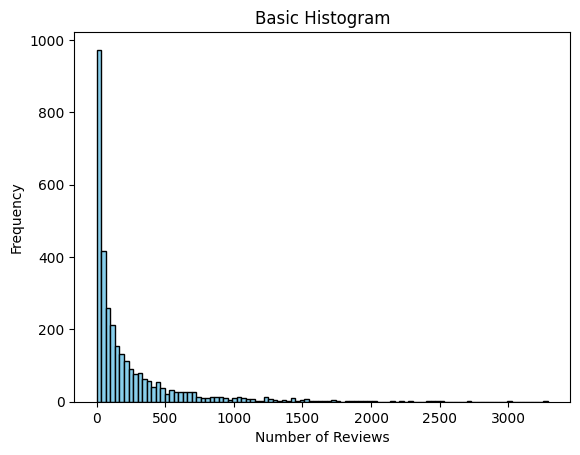

In [6]:
plt.hist(df['number_of_reviews'], bins=100, color='skyblue', edgecolor='black')
# Adding labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

Μελετώντας το παραπανω ιστόγραμμα, κρίνουμε πως ικανός αριθμός 'number_of_reviews' ειναι το >=250. 

Μπύρες με χαμηλότερο αριθμό κρητικών, <250 δεν λαμβάνονται υπόψιν.

In [7]:
# Filter Dataframe
more_than_250_reviews = df.loc[(df.number_of_reviews >= 250)]
top_rated = more_than_250_reviews.sort_values(by=['review_overall'], ascending=False)
thres = 14
top_rated = top_rated[:thres]

Δημιουργία διαγράμματος που να μας εμφανίζει τις 15 Highly Rated Beers

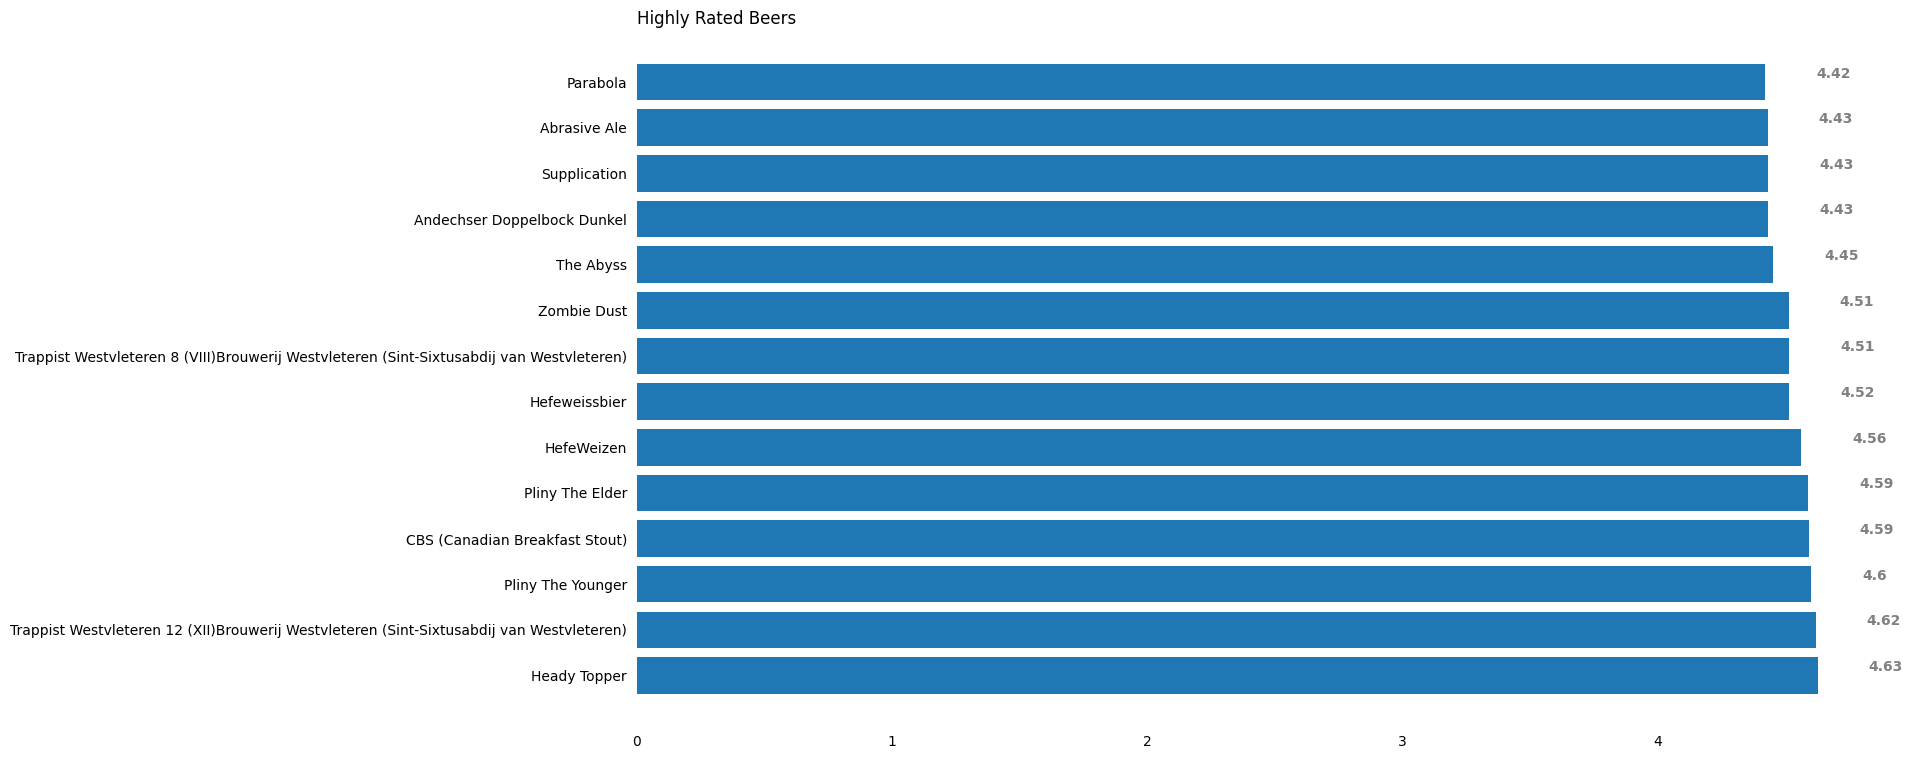

In [8]:
name = top_rated['Name']
review_overall = top_rated['review_overall']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, review_overall)

# Remove axes splines
for s in ['top','bottom', 'left', 'right']:
	 ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Highly Rated Beers',
			loc ='left', )

# Show Plot
plt.show()


 Θέλουμε να βρουμε τον αριθμό γραμμών που έχει το αρχείο csv

In [9]:

import pandas as pd
import numpy as np

filename = "beer_profile_and_ratings.csv"

df = pd.read_csv(filename)



num_rows = df.shape [0]
print("αριθμός γραμμών: ", num_rows)


αριθμός γραμμών:  3197


Θέλουμε να βρουμε το εύρος τιμών της στήλης ABV (% αλκοόλ)


In [10]:
import pandas as pd
import numpy as np

filename = "beer_profile_and_ratings.csv"

df = pd.read_csv(filename)

abv_range= (df['ABV'].min(), df['ABV'].max())
print ("εύρος τιμών : " , abv_range)


εύρος τιμών :  (0.0, 57.5)


Χαρακτηρισμός όλων των μπυρών βάση του abv σε strong- medium - non alcohol και να βρούμε πόσες είναι σε κάθε κατηγορία.

In [11]:
import pandas as pd
import numpy as np

filename = "beer_profile_and_ratings.csv"

df = pd.read_csv(filename)

#Assign Variables 
i = 0 
strongAmmount = 0
mediumAmmount = 0
nonAlcohol = 0 


def categorize_by_abv(value):
    global strongAmmount
    global mediumAmmount
    global nonAlcohol 
    if value >= 5.8 :
        strongAmmount = strongAmmount+1
        return 
    elif value >= 0.5 :
        mediumAmmount = mediumAmmount+1
        return 
    else:
        nonAlcohol = nonAlcohol+1
        return 
    

while i < len(df['ABV']):
    categorize_by_abv(df['ABV'][i])
    i = i+1

print("Αποτελέσματα: ")
print("strong:      ",strongAmmount)
print("medium:      ",mediumAmmount)
print("non alcohol: ",nonAlcohol)



Αποτελέσματα: 
strong:       1708
medium:       1470
non alcohol:  19


Υπολογισμός Μ.Ο της στήλης "review_overall"

In [12]:
import pandas as pd
import numpy as np

filename = "beer_profile_and_ratings.csv"

df = pd.read_csv(filename)

mean_review_overall = df['review_overall'].mean()
print("M.O ΣΤΗΛΗΣ review-overal:" , format(mean_review_overall, ".2f"))


M.O ΣΤΗΛΗΣ review-overal: 3.75


TOP 10 BEER σε reviews με περισσότερες απο 250 κριτικές

In [13]:
import pandas as pd
import numpy as np

filename = "beer_profile_and_ratings.csv"

df = pd.read_csv(filename)


filtered_df = df[df['number_of_reviews'] > 250]


top_10_df = filtered_df.sort_values(by='review_overall', ascending=False).head(10)


top_10_names = top_10_df['Beer Name (Full)'].tolist()
print("Top 10 Companies with Over 250 Reviews and Highest Overall Review Scores:")
for company_name in top_10_names:
    print(company_name)


Top 10 Companies with Over 250 Reviews and Highest Overall Review Scores:
The Alchemist Heady Topper
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren) Trappist Westvleteren 12
Russian River Brewing Company Pliny The Younger
Founders Brewing Company Founders CBS Imperial Stout
Russian River Brewing Company Pliny The Elder
Live Oak Brewing Company Live Oak HefeWeizen
Bayerische Staatsbrauerei Weihenstephan Weihenstephaner Hefeweissbier
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren) Trappist Westvleteren 8
Three Floyds Brewing Co. & Brewpub Zombie Dust
Deschutes Brewery The Abyss


Δημιουργία διαγράμματος που μας εμφανίζει τον δείκτη ABV (Alcohol by Volume) των top 10 highly rated beers

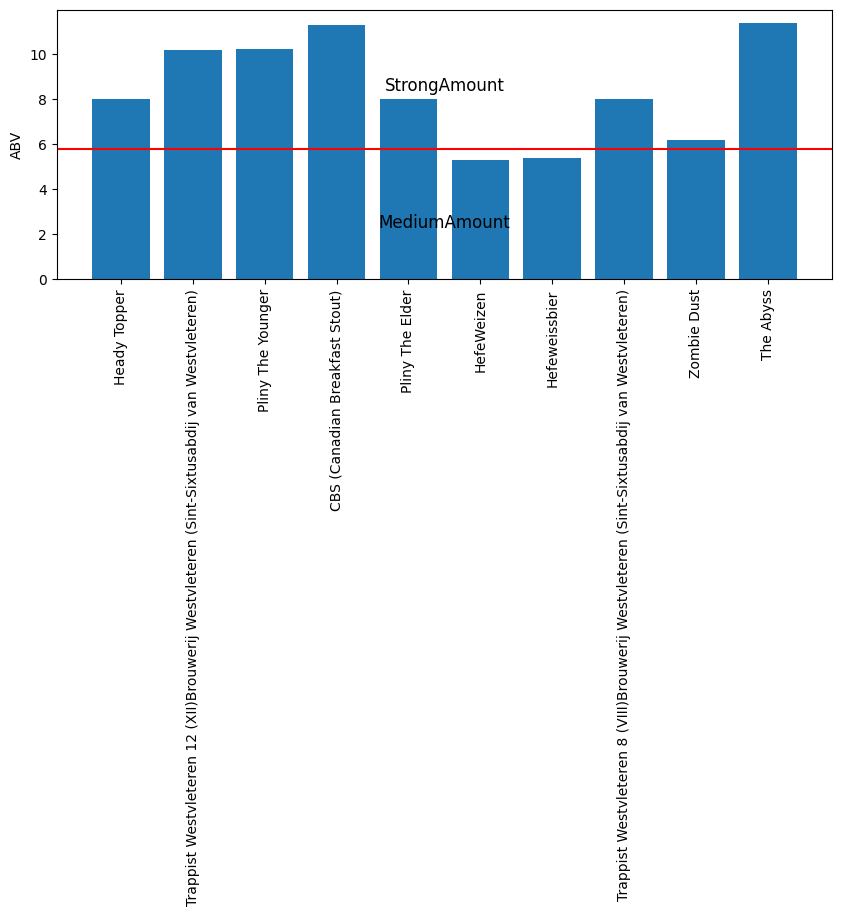

In [48]:
name = top_10_df['Name']
ABV = top_10_df['ABV']
 
# Figure Size
fig = plt.figure(figsize =(10, 3.5))
 
# Horizontal Bar Plot
plt.bar(name, ABV)
plt.ylabel('ABV')
plt.xticks(range(len(name)), name, rotation='vertical')
plt.axhline(y=5.8, color="red")
plt.text(4.5, 8.6, 'StrongAmount', fontsize=12, va='center', ha='center')
plt.text(4.5, 2.5, 'MediumAmount', fontsize=12, va='center', ha='center')

# Show Plot
plt.show()

## Συμπεράσματα

Βασιζόμενοι στο παρεχόμενο του Dataset, προσδιορίζονται και αναλύονται σημαντικά στατιστικά χαρακτηριστικά που περιλαμβάνουν πληροφορίες για μπύρες.
Αρχικά, φορτώνεται το Dataset σε ένα DataFrame και εκτυπώνονται στατιστικά στοιχεία για τις κριτικές, την περιεκτικότητα σε αλκοόλ, και τον αριθμό των κριτικών.

Η ανάλυση επικεντρώνεται στην εύρεση των 10 καλύτερων μπυρών βάσει των κριτικών και του ποσοστού αλκοόλ, εμφανίζοντας τις σχετικές πληροφορίες σε γραφική μορφή.
Επιπλέον, πραγματοποιείται κατηγοριοποίηση των μπύρων βάσει του ποσοστού αλκοόλ σε διάφορες κατηγορίες (Ισχυρές, Μέτριες, Χωρίς Αλκοόλ).

Επίσης, παρέχονται περαιτέρω πληροφορίες όπως, το εύρος τιμών του ποσοστού αλκοόλ, καθώς και ο μέσος όρος των κριτικών.
Τέλος, παρουσιάζεται ένα γράφημα που εμφανίζει τον δείκτη ABV των 10 καλύτερων μπύρων.

Συνολικά, διακρίνουμε οτι οι μπυρες με την μεγαλύτερη προτίμηση τείνουν να έχουν μεγαλύτερη περιεκτικοτητα σε αλκοόλ.